<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_xls_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>


# Python alapok xls és diagram



<https://klajosw.blogspot.com/>

<https://github.com/klajosw/>


---

---
# Adat elemzés 

## Adat diagram excelbe mentés

### Pandas és matplotlib csomaggal  diagram generálás és képfile be mentés majd excelbe töltés

### Pandas csomaggal  excel diagram generálás

---

1/2/22    1256415
2/2/22    1582517
dtype: int64
1/22/20
date
1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
dtype: int64


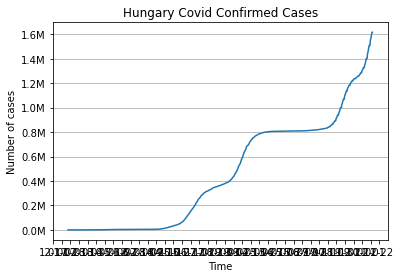

In [ ]:
#diagram generálás matplotlib-ből és beszúrás
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (
                               FormatStrFormatter, 
                               AutoMinorLocator,
                               FuncFormatter,
                               )

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters

# https://github.com/CSSEGISandData/COVID-19
df = pd.read_csv(r'c:\Users\User\Downloads\time_series_covid19_confirmed_global.csv')
df = df[df["Country/Region"] == 'Hungary']                ## magyarországra szűrés

df = df.iloc[:,4:]                                        ## első 5 oszlop kihagyása            

global_num = df.sum()
global_num.filter(like='2/22')

result = global_num.filter(like = '/1/22' and  '/2/22')
print(result)

# global_num['kldate1'] = pd.to_datetime(global_num.index)  

print (global_num.index[0] )

global_num.index.name = 'date'
#global_num.to_frame(name='date').query('date >= "2022-01-01"').reset_index()   

print (global_num.head() )

fig, ax = plt.subplots()
ax.set(title  = 'Hungary Covid Confirmed Cases',
       xlabel = 'Time',
       ylabel = 'Number of cases')

## formázások
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(x/1000000) +'M'))

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=3))
ax.yaxis.grid()

dates = pd.to_datetime(global_num.index)

## diagram előállítása
plt.plot(dates, global_num)
plt.savefig(r'c:\Users\User\Downloads\kl_plot.png')    ## generált diagram mentés kép állományba
plt.show()

## diagram kép xls-be beszúrás
writer = pd.ExcelWriter(r'c:\Users\User\Downloads\kl_plot1.xlsx', engine = 'xlsxwriter')
global_num.to_excel(writer, sheet_name='Munka1')
worksheet = writer.sheets['Munka1']
worksheet.insert_image('C2', r'c:\Users\User\Downloads\kl_plot.png')

## mentés és lezárás
writer.save()
writer.handles.close()

In [ ]:
## Diagram generállás közvetlenül excelből
import pandas as pd
import numpy as np

## adat generálás
data = pd.DataFrame(
    {'A': [np.random.uniform(0.1*i, 0.1*i + 1) for i in range(100)],
     'B': [np.random.uniform(0.1*i, 0.1*i + 1) for i in range(100)]}
)

## pandas excel beállítások
excel_file = r'c:\Users\User\Downloads\kl_plot2.xlsx'
sheet_name = 'Munka1'
writer = pd.ExcelWriter(excel_file, engine='xlsxwriter')
data.to_excel(writer, sheet_name=sheet_name)

## excel munkafuzet munkalap beállítás
workbook = writer.book
worksheet = writer.sheets[sheet_name]

## diagram előkészítés
chart = workbook.add_chart({'type': 'scatter'})

## sor és oszlop generálás/töltés (táblázat)
max_row = len(data)
col_x = data.columns.get_loc('A') + 1
col_y = data.columns.get_loc('B') + 1

## diagram feltöltés
chart.add_series({
    'name':       "Samples",
    'categories': [sheet_name, 1, col_x, max_row, col_x],
    'values':     [sheet_name, 1, col_y, max_row, col_y],
    'marker':     {'type': 'circle', 'size': 4},
    'trendline': {'type': 'linear'},
})

## felíratok elkészítése
chart.set_x_axis({'name': 'Concentration'})
chart.set_y_axis({'name': 'Measured',
                  'major_gridlines': {'visible': False}})

## diagra beszúrás D2 cellába
worksheet.insert_chart('D2', chart)

## mentés és lezárás
writer.save()
writer.handles.close()

In [ ]:
## szűrés, rendezés és adatmanipulás pandas-sal
import pandas as pd
import matplotlib.pyplot as plt
'''
szűrés rendezés pandas-sal
'''

def process_data(filename):
    data = pd.read_csv(filename)
    data = data[data["Country/Region"] == 'Hungary']              ## szűrés magyarországra
    del data['Lat']                                               ## szükségtelen oszlopok törlése
    del data['Long']                                              ## szükségtelen oszlopok törlése
    df = data.groupby('Country/Region').sum().T                   ## csoportosítás
    
    df['date'] = pd.to_datetime(df.index)                         ## új mező létrehozása az idexmezőből
    
    df['rev_day'] = df['Hungary'].shift(periods=-1, fill_value=0) ## új mező eltolt értékből
    
    '''
    lags and leads létrehozása python-ban
    shifted_df=df.shift(periods=-1,
                    axis=1,
                    fill_value=4)
    '''
    
    print(df[df['date'] > '1/1/22'][-12:])                     ## szűrás dátumra szabály megadással   
    
    df2=incremental_data(df)
    print(df2.shift()[-12:])    

    
    df= df.query('date >= "2022-01-01"').reset_index()        ## szűrás dátumra  Query módszer  
#    print(df.iloc[1:5, :3])                                  ## sor és oszlop szerint szűrés    

    return df.head()                                          ## csat az első 5 sor
#   return df.teal()                                          ## csat az első 5 sor

def incremental_data(data):                                   ## eltolt (egynappal ezelötti)
  d = data-data.shift();
  d = d.drop(d.index[0])
  d['dat']=data['date']
  return d;

def rolling(data,window):                                    ## mozgó átlag
  df = data.rolling(window).mean()
  df['date'] = pd.to_datetime(df.index)
  return df[(window-1):]


  
df = process_data(r'c:\Users\kecskemetil\Downloads\kl\time_series_covid19_confirmed_global.csv')
#df = incremental_data(df)
df.sort_values(by=['date'], ascending=False)                    ## rendezés dátum szerint csökkenő 

Country/Region  Hungary       date  rev_day
1/25/22         1451102 2022-01-25  1471276
1/26/22         1471276 2022-01-26  1490489
1/27/22         1490489 2022-01-27  1508358
1/28/22         1508358 2022-01-28  1508358
1/29/22         1508358 2022-01-29  1508358
1/30/22         1508358 2022-01-30  1553405
1/31/22         1553405 2022-01-31  1562827
2/1/22          1562827 2022-02-01  1582517
2/2/22          1582517 2022-02-02  1600411
2/3/22          1600411 2022-02-03  1616846
2/4/22          1616846 2022-02-04  1616846
2/5/22          1616846 2022-02-05        0
Country/Region  Hungary   date  rev_day        dat
1/25/22         39928.0 1 days   9717.0 2022-01-24
1/26/22          9717.0 1 days  20174.0 2022-01-25
1/27/22         20174.0 1 days  19213.0 2022-01-26
1/28/22         19213.0 1 days  17869.0 2022-01-27
1/29/22         17869.0 1 days      0.0 2022-01-28
1/30/22             0.0 1 days      0.0 2022-01-29
1/31/22             0.0 1 days  45047.0 2022-01-30
2/1/22          4504

Country/Region,index,Hungary,date,rev_day
4,1/5/22,1269979,2022-01-05,1276433
3,1/4/22,1264709,2022-01-04,1269979
2,1/3/22,1262280,2022-01-03,1264709
1,1/2/22,1256415,2022-01-02,1262280
0,1/1/22,1256415,2022-01-01,1256415


     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[169 rows x 4 columns]
Minimum   :  Duration     15.0
Pulse        80.0
Maxpulse    100.0
Calories     50.3
dtype: float64
maximum   :  Duration     300.0
Pulse        159.0
Maxpulse     184.0
Calories    1860.4
dtype: float64
Max pulse :  18161


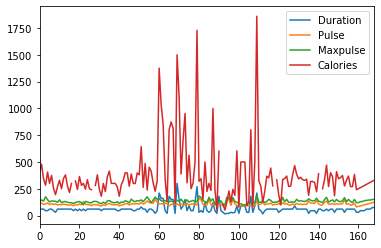

Előfordulásszám :            Pulse  Maxpulse  Calories
Duration                           
15            2         2         2
20            9         9         9
25            1         1         1
30           16        16        16
45           35        35        33
60           79        79        76
75            2         2         2
80            1         1         1
90            8         8         8
120           3         3         3
150           4         4         4
160           2         2         2
180           3         3         3
210           2         2         2
270           1         1         1
300           1         1         1


ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
## alap diagram létrehozás és mentés
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"c:\Users\kecskemetil\Downloads\data.csv")
# df = df[df.Pulse == 80]                               ## szűrés
# print(df.sort_values(by=['Pulse'],ascending=True))    ## rendezés
print(df)
## Ellenőrző értékek
print('Minimum   : ', df.min())
print('maximum   : ', df.max())
print('Max pulse : ', df['Pulse'].sum())
      
df.plot()
plt.savefig(r'c:\Users\kecskemetil\Downloads\kl\kl_plot.png')  ## mentés kép állományba
plt.show()

## group by használat
df2 = df.groupby(['Duration']).aggregate('count')
print('Előfordulásszám : ', df2)

## pivote használat
pivot1=df.pivot(index='Duration',columns='Maxpulse',values='Calories')
print('Pivot tábla : ', pivot1)


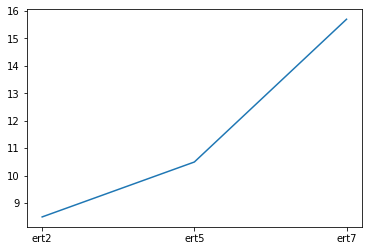

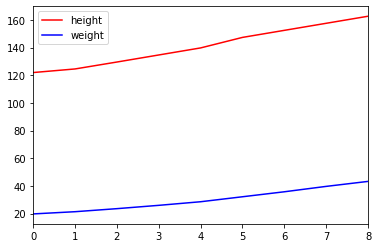

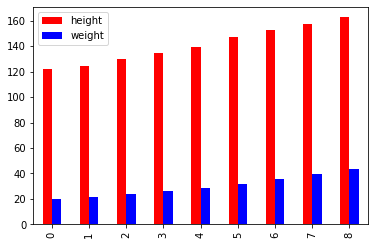

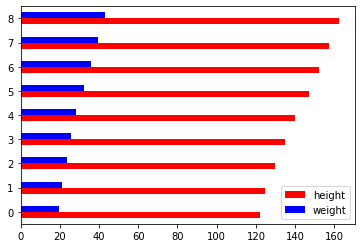

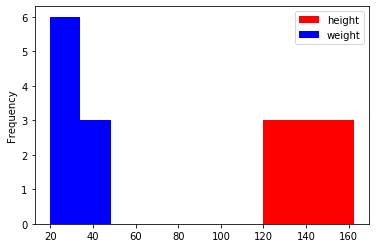

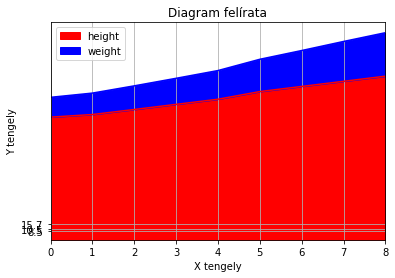

In [ ]:
import matplotlib.pyplot as plt 

## x értek
x_ertek=["ert2","ert5","ert7"]  ## akár szöveg is lehet
# Y érték (csak szám lehet)
y_ertek=[8.5,10.5, 15.7]
# diagram létrehozása
plt.plot(x_ertek, y_ertek)
#---
df.plot(kind='line', color=['red','blue'])
df.plot(kind='bar', color=['red','blue'])
df.plot(kind='barh', color=['red','blue'])
df.plot(kind='hist', color=['red','blue'])
df.plot(kind='area', color=['red','blue'])
#df.plot(kind='scatter', color=['red','blue'])

#plt.bar(x_ertek, y_ertek)
#plt.scatter((x_ertek, y_ertek)

plt.xlabel("X tengely")  
plt.ylabel("Y tengely") 
plt.title("Diagram felírata")  
plt.grid(True)                                                ## rácsozat bekapocsolása
plt.yticks(y_ertek)
# mentése
plt.savefig(r'c:\Users\kecskemetil\Downloads\kl\kl_plot.png')  ## mentés kép állományba
# megjelenítése
plt.show()

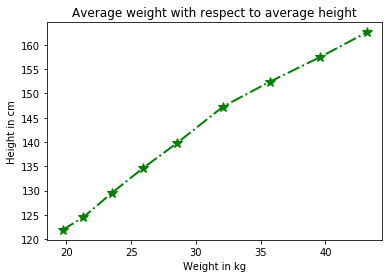

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd
height=[121.9,124.5,129.5,134.6,139.7,147.3,152.4,157.5,162.6]
weight=[19.7,21.3,23.5,25.9,28.5,32.1,35.7,39.6,43.2]
df=pd.DataFrame({"height":height,"weight":weight})
#Set xlabel for the plot
plt.xlabel('Weight in kg')
#Set ylabel for the plot
plt.ylabel('Height in cm')
#Set chart title:
plt.title('Average weight with respect to average height')
#plot using marker'-*' and line colour as green
plt.plot(df.weight,df.height,marker='*',markersize=10,color='green',linewidth=2, linestyle='dashdot')
plt.show()

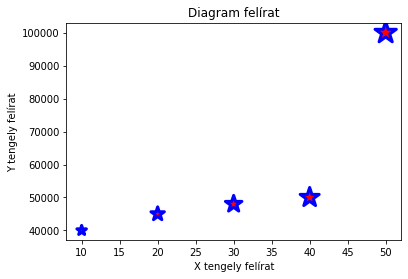

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
discount= np.array([10,20,30,40,50])
saleInRs=np.array([40000,45000,48000,50000,100000])
size=discount*10
plt.scatter(x=discount,y=saleInRs,s=size,color='red',linewidth=3,marker='*',edgecolor='blue')
plt.title('Diagram felírat')
plt.xlabel('X tengely felírat')
plt.ylabel('Y tengely felírat')
plt.show()

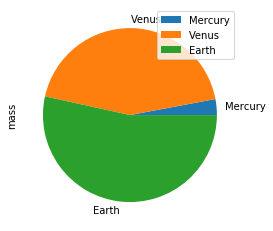

mass         0.33
radius    2439.70
dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],'radius': [2439.7, 6051.8, 6378.1]},index=['Mercury', 'Venus', 'Earth'])
df.plot(kind='pie',y='mass')
plt.show()

print(df.min())

In [ ]:
## pandas series
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from pandas import DataFrame, Series 

s1 = Series(range(7,14))           
print(s1.index.tolist())           #  -> [0, 1, 2, 3, 4, 5, 6]
print(s1.values.tolist())          #  -> [7, 8, 9, 10, 11, 12, 13]
s2 = Series(range(0,7))           
print(s2.values.tolist())          # -> [0, 1, 2, 3, 4, 5, 6]
s3 = s1 + s2                   
print(s3.values.tolist())          # -> [7, 9, 11, 13, 15, 17, 19]
s4 = Series(['a','b'])*3          
print(s4.values.tolist())          # -> 'aaa','bbb'
print ('Egyedi érték darabszáma: ', s1.index.nunique() )

[0, 1, 2, 3, 4, 5, 6]
[7, 8, 9, 10, 11, 12, 13]
[0, 1, 2, 3, 4, 5, 6]
[7, 9, 11, 13, 15, 17, 19]
['aaa', 'bbb']
Egyedi érték darabszáma:  7


In [ ]:
## pandas dataframe
## csv megnyítás teljes alak
#df = pd.read_csv(r'C:/tmp/file.csv', header=0,  index_col=0, quotechar='"',sep=':', na_values = ['na', '-', '.', ''])